In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
dfCSV = pd.read_csv(url, index_col=['Provincia', 'Fecha'])

In [3]:
# Prepare
dfCSV['pctChange'] = dfCSV.groupby(level='Provincia')['Ingresados'].pct_change() * 100
dfCSV.loc['Huelva', ['Ingresados', 'pctChange']].tail(3)

,Ingresados,pctChange
Fecha,,
26/04/2020,210,0.478469
27/04/2020,211,0.476190
28/04/2020,214,1.421801


In [4]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(1)

Provincia  Fecha     
Almería    28/04/2020    0.000000
Cádiz      28/04/2020    1.162791
Córdoba    28/04/2020    0.000000
Granada    28/04/2020   -0.177778
Huelva     28/04/2020    1.421801
Jaén       28/04/2020    0.583090
Málaga     28/04/2020    0.286533
Sevilla    28/04/2020    0.903342
Total      28/04/2020    0.433426
Name: pctChange, dtype: float64

In [5]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(2).describe()

count    18.000000
mean      0.424897
std       0.412109
min      -0.177778
25%       0.155497
50%       0.411265
75%       0.556365
max       1.421801
Name: pctChange, dtype: float64

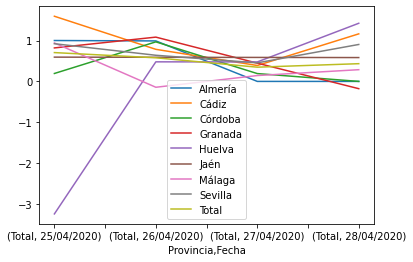

In [6]:
dias = 4
dfCSV[dias*-9:].groupby(level='Provincia')['pctChange'].plot(legend=True)
plt.show()

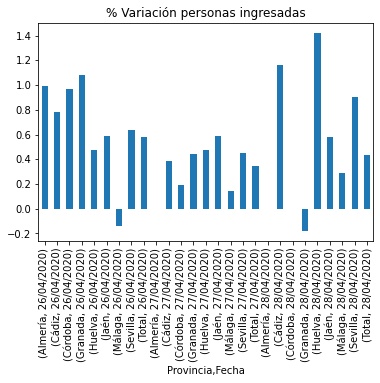

In [7]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(3).plot(kind='bar', title='% Variación personas ingresadas')
plt.show()

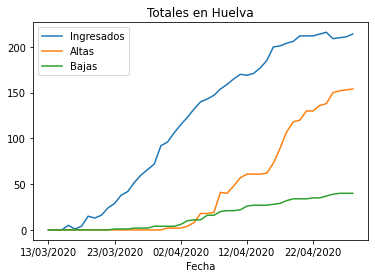

In [8]:
dfCSV.loc['Huelva'][['Ingresados', 'Altas', 'Bajas']].plot(title='Totales en Huelva')
plt.show()

In [9]:
provincia_select = 'Total'
data = dfCSV.loc[provincia_select][['Ingresados', 'pctChange']]

In [10]:
title = '% Variación personas ingresadas últimos días en ' + provincia_select
print(title)
data[-7:][['pctChange']]

% Variación personas ingresadas últimos días en Total


,pctChange
Fecha,
22/04/2020,1.016518
23/04/2020,0.916442
24/04/2020,1.050570
25/04/2020,0.704846
26/04/2020,0.577428
27/04/2020,0.347947
28/04/2020,0.433426


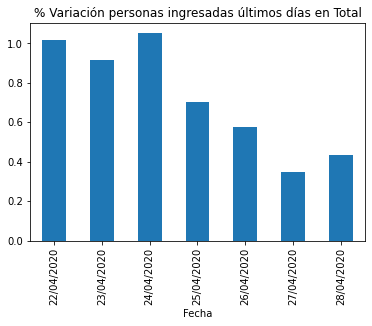

In [11]:
data[-7:]['pctChange'].plot(kind='bar', title=title)
plt.show()

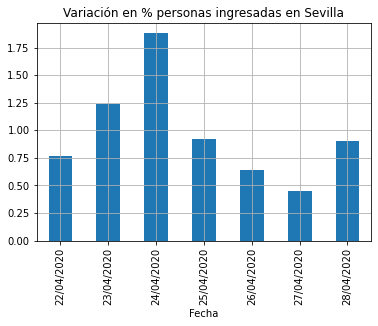

In [14]:
provincia_title = 'Sevilla'
lastweek_data = dfCSV.loc[provincia_title][-7:]['pctChange']
lastweek_data.plot(kind='bar', title='Variación en % personas ingresadas en ' + provincia_title, grid=True)
plt.show()

In [15]:
print(lastweek_data)

Fecha
22/04/2020    0.766284
23/04/2020    1.235741
24/04/2020    1.877934
25/04/2020    0.921659
26/04/2020    0.639269
27/04/2020    0.453721
28/04/2020    0.903342
Name: pctChange, dtype: float64
